Simple Linear Regression

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [46]:
#Reading the datasets
df = pd.read_csv('height-weight.csv')

In [47]:
df.head()

,Weight,Height
0,70,175
1,65,168
2,80,180
3,55,160
4,90,185


In [48]:
df.shape

(24, 2)

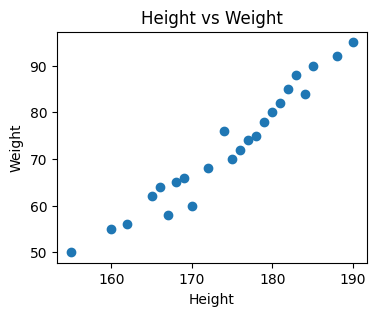

In [49]:
# Ploting the dataset on scatterPlot
plt.figure(figsize=(4,3))
plt.scatter(df['Height'],df['Weight'])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height vs Weight')
plt.show()


In [50]:
# Dividing the dataset into independent and dependent variable.
X = df[['Weight']] # Independent Feature
y = df['Height'] # Dependent Feature

In [51]:
X,y

(    Weight
 0       70
 1       65
 2       80
 3       55
 4       90
 5       60
 6       75
 7       85
 8       50
 9       95
 10      68
 11      72
 12      78
 13      62
 14      88
 15      58
 16      82
 17      66
 18      74
 19      64
 20      76
 21      84
 22      56
 23      92,
 0     175
 1     168
 2     180
 3     160
 4     185
 5     170
 6     178
 7     182
 8     155
 9     190
 10    172
 11    176
 12    179
 13    165
 14    183
 15    167
 16    181
 17    169
 18    177
 19    166
 20    174
 21    184
 22    162
 23    188
 Name: Height, dtype: int64)

In [52]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .20,random_state = 42)

In [53]:
X.shape,y.shape

((24, 1), (24,))

In [54]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((19, 1), (5, 1), (19,), (5,))

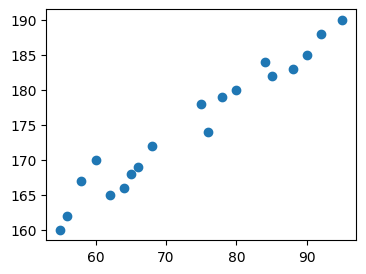

In [55]:
# Ploting the X_train and y_train on scatterplot
plt.figure(figsize=(4,3))
plt.scatter(X_train,y_train)
plt.show()

In [56]:
# Train the model Simple Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()


In [57]:
model

LinearRegression()

In [58]:
model.fit(X_train,y_train)

LinearRegression()

In [59]:
print("The slope or coefficient of weight is: ",model.coef_)
print("The intercept of line is: ",model.intercept_)

The slope or coefficient of weight is:  [0.68449364]
The intercept of line is:  124.51380986862523


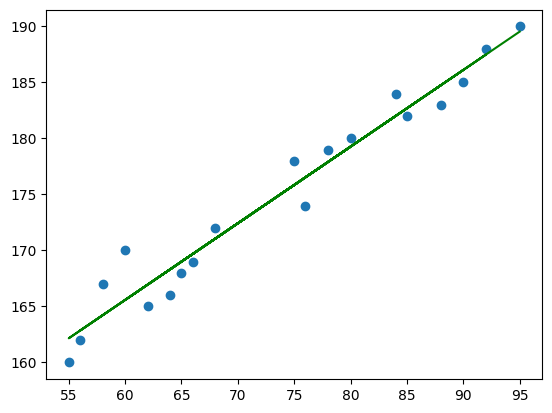

In [60]:
plt.scatter(X_train,y_train)
plt.plot(X_train,model.predict(X_train),color='g')
plt.show()

In [61]:
y_pred_test = model.predict(X_test)

In [62]:
y_pred_test,y_test

(array([158.73849178, 180.6422882 , 172.42836454, 175.16633909,
        173.79735182]),
 8     155
 16    181
 0     175
 18    177
 11    176
 Name: Height, dtype: int64)

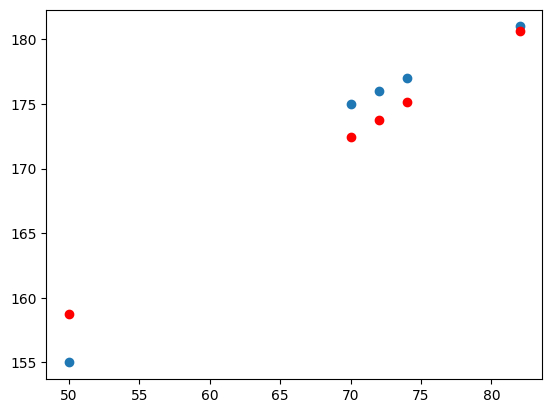

In [63]:
plt.scatter(X_test,y_test)
plt.scatter(X_test,model.predict(X_test), c='r')
plt.show()





*   Performance Metrics
*   MSE,RMSE,MAE


* R2 Score,Adjusted R2 Score   





In [64]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [65]:
mse = mean_squared_error(y_test,y_pred_test)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,y_pred_test)
print("Mean Squared Error: ",mse)
print("Root Mean Squared Error: ",rmse)
print("Mean Absolute Error: ",mae)

Mean Squared Error:  5.786311757826086
Root Mean Squared Error:  2.4054753704467826
Mean Absolute Error:  2.1408296265646016


In [66]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred_test)
print(score)
print("R2 Score: ",score * 100,'%')

0.9305864712352917
R2 Score:  93.05864712352917 %


In [67]:
X_test.shape[1]

1

In [68]:
# Display Adjusted R2 Score
adjusted_r2 = 1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Adjusted R2 Score: ",adjusted_r2 * 100,'%')

Adjusted R2 Score:  90.74486283137223 %


In [69]:
model

LinearRegression()

In [70]:
weight = [[100]]

In [71]:
print('The Height of the person with weight 100 is: ',model.predict(weight))

The Height of the person with weight 100 is:  [192.96317368]


Assumption of Linear Regression

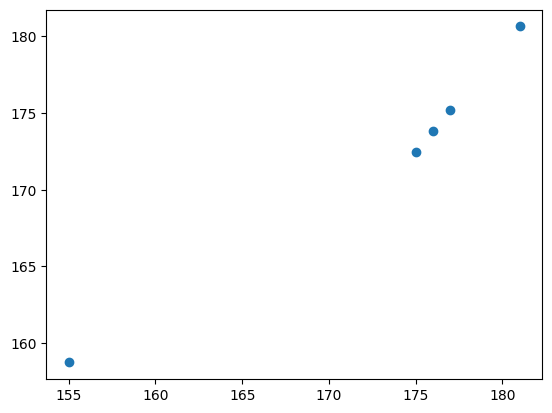

In [72]:
# Plot a scatter plot for the prediction
plt.scatter(y_test,y_pred_test)
plt.show()

In [73]:
# Residuals
residuals = y_test  - y_pred_test
print(residuals)

8    -3.738492
16    0.357712
0     2.571635
18    1.833661
11    2.202648
Name: Height, dtype: float64


In [74]:
import seaborn as sns

<Axes: xlabel='Height', ylabel='Density'>

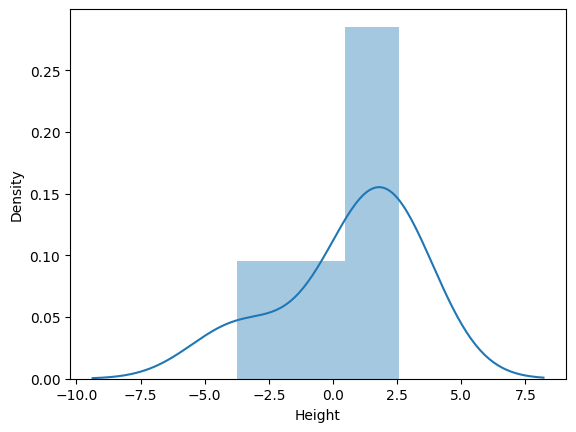

In [76]:
sns.distplot(residuals,kde = True)

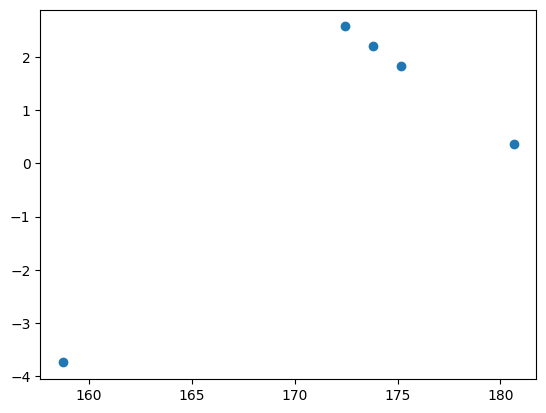

In [77]:
# Scatter plot with respect to prediction and residuals
plt.scatter(y_pred_test,residuals)
plt.show()